In [1]:
%cd /content/drive/MyDrive/Recommendation Engine

/content/drive/MyDrive/Recommendation Engine


In [2]:
import pandas as pd
import numpy as np

In [3]:
movies_df = pd.read_csv("./100k/movies.csv")
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [4]:
ratings_df = pd.read_csv("./100k/ratings.csv")
ratings_df


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


## Now combine the two tables and drop things we dont have to use



In [5]:
merged_df_on_movieId = pd.merge(ratings_df, movies_df, on='movieId')


In [6]:
merged_df_on_movieId

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama
...,...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance


In [7]:
merged_df_on_movieId = merged_df_on_movieId.drop(['timestamp', 'genres'], axis=1)
merged_df_on_movieId.head()

,userId,movieId,rating,title
0,1,31,2.5,Dangerous Minds (1995)
1,7,31,3.0,Dangerous Minds (1995)
2,31,31,4.0,Dangerous Minds (1995)
3,32,31,4.0,Dangerous Minds (1995)
4,36,31,3.0,Dangerous Minds (1995)


In [8]:
merged_df_on_movieId.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100004 non-null  int64  
 1   movieId  100004 non-null  int64  
 2   rating   100004 non-null  float64
 3   title    100004 non-null  object 
dtypes: float64(1), int64(2), object(1)
memory usage: 3.8+ MB


In [9]:

movie_ratingCount = (merged_df_on_movieId.groupby(by = ['title'])['rating'].count().reset_index().
                     rename(columns = {'rating': 'totalRatingCount'})[['title', 'totalRatingCount']])
movie_ratingCount.head(10)

,title,totalRatingCount
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2
5,'Salem's Lot (2004),1
6,'Til There Was You (1997),4
7,"'burbs, The (1989)",19
8,'night Mother (1986),3
9,(500) Days of Summer (2009),45


In [10]:
movie_ratingCount

,title,totalRatingCount
0,"""Great Performances"" Cats (1998)",2
1,$9.99 (2008),3
2,'Hellboy': The Seeds of Creation (2004),1
3,'Neath the Arizona Skies (1934),1
4,'Round Midnight (1986),2
...,...,...
9059,xXx (2002),23
9060,xXx: State of the Union (2005),1
9061,¡Three Amigos! (1986),31
9062,À nous la liberté (Freedom for Us) (1931),1


In [11]:
rating_with_totalRatingCount = merged_df_on_movieId.merge(movie_ratingCount, left_on = 'title', right_on = 'title', how = 'left')
rating_with_totalRatingCount.head(10)

,userId,movieId,rating,title,totalRatingCount
0,1,31,2.5,Dangerous Minds (1995),42
1,7,31,3.0,Dangerous Minds (1995),42
2,31,31,4.0,Dangerous Minds (1995),42
3,32,31,4.0,Dangerous Minds (1995),42
4,36,31,3.0,Dangerous Minds (1995),42
5,39,31,3.0,Dangerous Minds (1995),42
6,73,31,3.5,Dangerous Minds (1995),42
7,88,31,3.0,Dangerous Minds (1995),42
8,96,31,2.5,Dangerous Minds (1995),42
9,110,31,4.0,Dangerous Minds (1995),42


## Now drop the duplicate data


In [12]:
user_rating = rating_with_totalRatingCount.drop_duplicates(['userId','title'])
user_rating.head(10)

,userId,movieId,rating,title,totalRatingCount
0,1,31,2.5,Dangerous Minds (1995),42
1,7,31,3.0,Dangerous Minds (1995),42
2,31,31,4.0,Dangerous Minds (1995),42
3,32,31,4.0,Dangerous Minds (1995),42
4,36,31,3.0,Dangerous Minds (1995),42
5,39,31,3.0,Dangerous Minds (1995),42
6,73,31,3.5,Dangerous Minds (1995),42
7,88,31,3.0,Dangerous Minds (1995),42
8,96,31,2.5,Dangerous Minds (1995),42
9,110,31,4.0,Dangerous Minds (1995),42


In [13]:
user_rating.shape

(100003, 5)

In [14]:
user_rating

,userId,movieId,rating,title,totalRatingCount
0,1,31,2.5,Dangerous Minds (1995),42
1,7,31,3.0,Dangerous Minds (1995),42
2,31,31,4.0,Dangerous Minds (1995),42
3,32,31,4.0,Dangerous Minds (1995),42
4,36,31,3.0,Dangerous Minds (1995),42
...,...,...,...,...,...
99998,664,60832,3.0,Pathology (2008),1
100000,664,72380,3.5,"Box, The (2009)",1
100001,665,129,3.0,Pie in the Sky (1996),1
100002,665,4736,1.0,Summer Catch (2001),1


## Matrix Factorization


### Now create a matrix and fill 0 values


In [15]:
# Item Based Filtering

In [16]:
movie_user_rating_pivot = user_rating.pivot(index = 'userId', columns = 'title', values = 'rating').fillna(0)
movie_user_rating_pivot

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),...,Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
X = movie_user_rating_pivot.values.T #extracted the values
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
X.shape

(9064, 671)

In [19]:
Y = movie_user_rating_pivot.values
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [20]:
Y.shape

(671, 9064)

## Now lets fit the model using Singular Value Decomposition


## Item Based Filtering

In [21]:
import sklearn
from sklearn.decomposition import TruncatedSVD #Imported truncated singular value Decomposition which reduces the dimention of the matrix

SVD = TruncatedSVD(n_components=12, random_state=17) # intantiated SVD with the number of columns finally
matrix = SVD.fit_transform(X) # fit and transform
matrix.shape

(9064, 12)

In [22]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
movies_corr = np.corrcoef(matrix)  # Getting the correlation coefficients
movies_corr.shape

(9064, 9064)

In [23]:
movie_title = movie_user_rating_pivot.columns # To get all the movies
movie_title_list = list(movie_title)
coffey_hands = movie_title_list.index("Guardians of the Galaxy (2014)") # extracting the index of the movie we wanted to get the recommendations for

In [24]:
corr_coffey_hands  = movies_corr[coffey_hands] # Extracting the correlation coefficients of other movies based on the movie we are searching
list(movie_title[(corr_coffey_hands >= 0.95)])


['Abduction (2011)',
 'Adventures of Tintin, The (2011)',
 'Amazing Spider-Man, The (2012)',
 'Avengers, The (2012)',
 'Big Hero 6 (2014)',
 'Captain America: The First Avenger (2011)',
 'Dark Knight Rises, The (2012)',
 'Diary of a Wimpy Kid (2010)',
 'Drillbit Taylor (2008)',
 'Edge of Tomorrow (2014)',
 'Elysium (2013)',
 'Ex Machina (2015)',
 'Ghost Rider: Spirit of Vengeance (2012)',
 'Gravity (2013)',
 'Green Hornet, The (2011)',
 'Guardians of the Galaxy (2014)',
 'Hobbit: An Unexpected Journey, The (2012)',
 'In Time (2011)',
 'Indie Game: The Movie (2012)',
 'Iron Man 2 (2010)',
 'Iron Man 3 (2013)',
 'Limitless (2011)',
 'Pacific Rim (2013)',
 'Paperboy, The (2012)',
 'Resident Evil: Retribution (2012)',
 'Rio (2011)',
 'Skyfall (2012)',
 'Star Trek Into Darkness (2013)',
 'Star Wars: Episode VII - The Force Awakens (2015)',
 'TMNT (Teenage Mutant Ninja Turtles) (2007)',
 'The Hobbit: The Battle of the Five Armies (2014)',
 'The Hunger Games (2012)',
 'Thor (2011)',
 'Tron: L

## User Based Filtering

In [25]:
import sklearn
from sklearn.decomposition import TruncatedSVD #Imported truncated singular value Decomposition which reduces the dimention of the matrix

SVD = TruncatedSVD(n_components=12, random_state=17) # intantiated SVD with the number of columns finally
user_matrix = SVD.fit_transform(Y) # fit and transform 
user_matrix.shape

(671, 12)

In [26]:
import warnings
warnings.filterwarnings("ignore",category =RuntimeWarning)
user_corr = np.corrcoef(user_matrix)  # Getting the correlation coefficients
user_corr.shape

(671, 671)

In [27]:
user_ids = movie_user_rating_pivot.T.columns
user_id_list = list(user_ids)
user_index = user_id_list.index(10) # You can enter the user id of your choice

In [28]:
user_specific_corr  = user_corr[user_index] # Extracting the correlation coefficients of other movies based on the movie we are searching
list(user_ids[(user_specific_corr >= 0.9)])

[10, 66, 74, 155, 202, 214, 218, 271, 291, 368, 651]

## Generalized Matric Factorization using Keras

In [29]:
import string
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import regularizers
from tensorflow.keras import metrics
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [30]:
movies_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [31]:
ratings_df

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


In [32]:
pd.crosstab(ratings_df['userId'], movies_df['movieId']).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,161830,161918,161944,162376,162542,162672,163056,163949,164977,164979
userId,,,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are gaps in each user id and in each movie id, It's not sequential numbers like 0,1,2,3,4 .. etc it something like 862, 8844, 15602, .. etc, so we will use LabelEncoder() for making them in a sequential way like 0,1,2,3,4 .. etc.

In [33]:
encoder = LabelEncoder()
ratings_df['user'] = encoder.fit_transform(ratings_df['userId'].values)
n_users = ratings_df['user'].nunique()

ratings_df['movie'] = encoder.fit_transform(ratings_df['movieId'].values)
n_movies = ratings_df['movie'].nunique()


ratings_df['rating'] = ratings_df['rating'].values.astype(np.float32)

min_rating = min(ratings_df['rating'])
max_rating = max(ratings_df['rating'])

n_users, n_movies, min_rating, max_rating

(671, 9066, 0.5, 5.0)

In [34]:
ratings_df

,userId,movieId,rating,timestamp,user,movie
0,1,31,2.5,1260759144,0,30
1,1,1029,3.0,1260759179,0,833
2,1,1061,3.0,1260759182,0,859
3,1,1129,2.0,1260759185,0,906
4,1,1172,4.0,1260759205,0,931
...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,670,4545
100000,671,6269,4.0,1065149201,670,4546
100001,671,6365,4.0,1070940363,670,4597
100002,671,6385,2.5,1070979663,670,4610


In [35]:
X = ratings_df[['user', 'movie']].values
y = ratings_df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(90003, 2) (90003,)
(10001, 2) (10001,)


In [36]:
X

array([[   0,   30],
       [   0,  833],
       [   0,  859],
       ...,
       [ 670, 4597],
       [ 670, 4610],
       [ 670, 4696]])

**Here we make a regularization to help model generalization by embeddings_regularizer hyperparameter, and we should make this regularization on all embedding tables as a specific for avoiding overfitting**


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding (Embedding)          (None, 1, 50)        33550       ['input_1[0][0]']                
                                                                                                  
 embedding_1 (Embedding)        (None, 1, 50)        453300      ['input_2[0][0]']                
                                                                                              

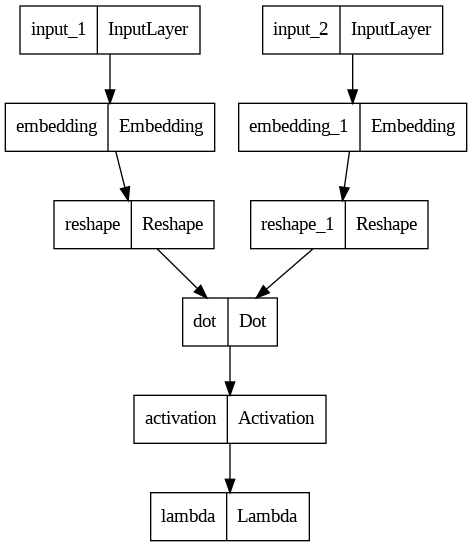

In [37]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Dot product
rating = layers.Dot(axes=1)([user_emb, movie_emb])
rating = layers.Activation('sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating) # scalling up

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse', metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
model.summary()
plot_model(model)

In [38]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=6, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/6
1407/1407 [==============================] - 9s 5ms/step - loss: 1.4544 - root_mean_squared_error: 1.2057 - val_loss: 0.9761 - val_root_mean_squared_error: 0.9871
Epoch 2/6
1407/1407 [==============================] - 8s 6ms/step - loss: 0.8177 - root_mean_squared_error: 0.9028 - val_loss: 0.8318 - val_root_mean_squared_error: 0.9101
Epoch 3/6
1407/1407 [==============================] - 7s 5ms/step - loss: 0.6545 - root_mean_squared_error: 0.8064 - val_loss: 0.8000 - val_root_mean_squared_error: 0.8917
Epoch 4/6
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5342 - root_mean_squared_error: 0.7270 - val_loss: 0.7930 - val_root_mean_squared_error: 0.8869
Epoch 5/6
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4309 - root_mean_squared_error: 0.6511 - val_loss: 0.7954 - val_root_mean_squared_error: 0.8875
Epoch 6/6
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3463 - root_mean_squared_error: 0.5814 - val_loss: 0.8084 

**RMSE is around 90%**


In the above code, the latent factors are depend on the dot product of users and movie ratings.
But there might be some prior movie or user factor, that dosen't depend on the relation between the user and movie ratings!
Like `how much movie is popular` which is independant of the specific user rating.Say a user never clicks a certain category of movies (popular), how can we recommend to him?
Or how much `user likes moives`, independant of his rating to specific movie.

We will make new two embeddings tables for `user_bias` and `movie_bias`, and **not not going to work with Dot layer, but adding after Dot**.

**Here also make regularization on`user_bias` and`movie_bias` embeddings layers**

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 50)        33550       ['input_3[0][0]']                
                                                                                                  
 embedding_4 (Embedding)        (None, 1, 50)        453300      ['input_4[0][0]']                
                                                                                            

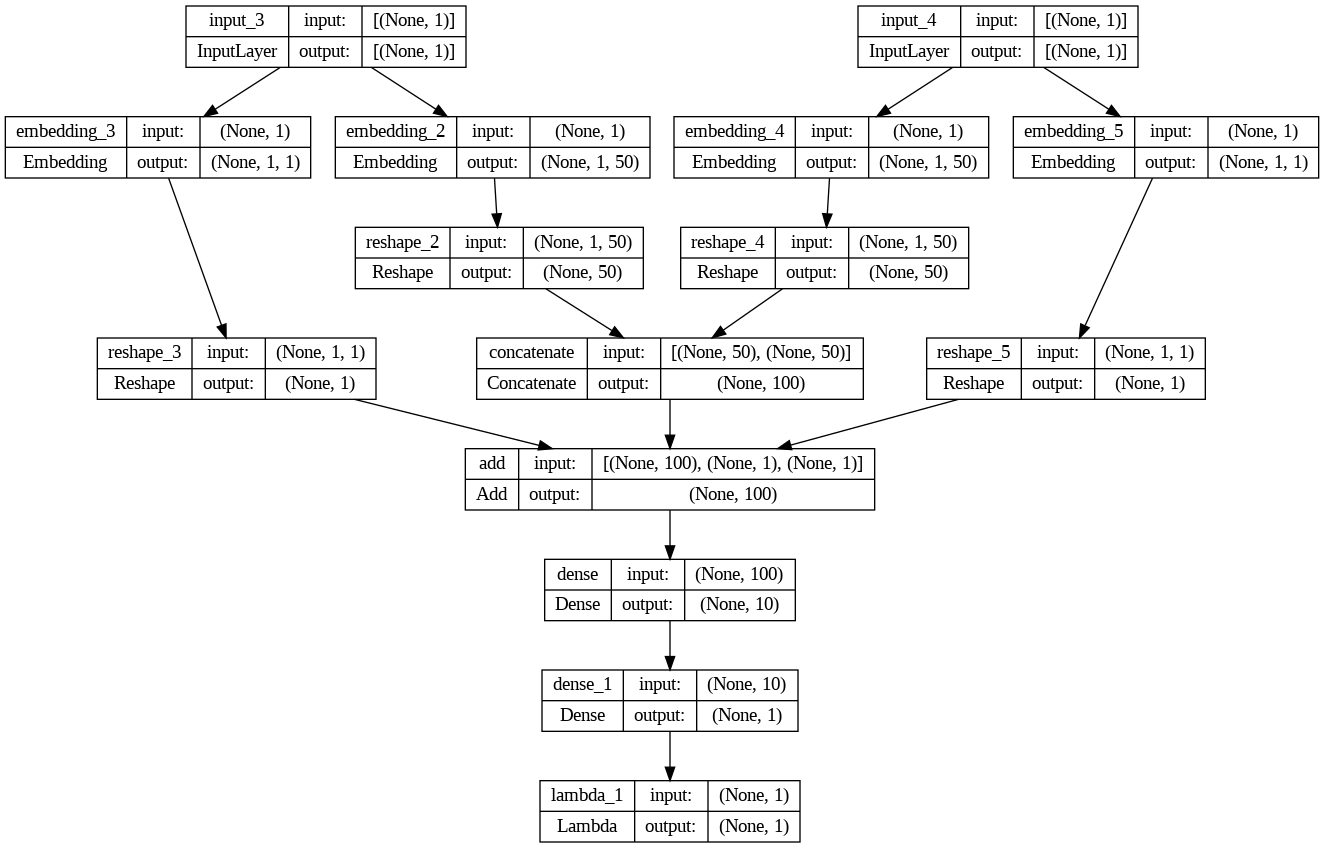

In [39]:
# Number of latent factors
emb_sz = 50

# User embeddings
user = layers.Input(shape=(1,))
user_emb = layers.Embedding(n_users, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_emb = layers.Reshape((emb_sz,))(user_emb)

# User bias
user_bias = layers.Embedding(n_users, 1, embeddings_regularizer=regularizers.l2(1e-6))(user)
user_bias = layers.Reshape((1,))(user_bias)

# Movie embeddings
movie = layers.Input(shape=(1,))
movie_emb = layers.Embedding(n_movies, emb_sz, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_emb = layers.Reshape((emb_sz,))(movie_emb)

# Movie bias
movie_bias = layers.Embedding(n_movies, 1, embeddings_regularizer=regularizers.l2(1e-6))(movie)
movie_bias = layers.Reshape((1,))(movie_bias)

# Dot product
rating = layers.Concatenate()([user_emb, movie_emb])

# Add biases
rating = layers.Add()([rating, user_bias, movie_bias])
rating = layers.Dense(10, activation='relu')(rating)
rating = layers.Dense(1, activation='sigmoid')(rating)
rating = layers.Lambda(lambda x:x*(max_rating - min_rating) + min_rating)(rating)

# Model
model = models.Model([user, movie], rating)

# Compile the model
model.compile(loss='mse',  metrics=metrics.RootMeanSquaredError(),
              optimizer=optimizers.Adam(lr=0.001))

# Show model summary
print(model.summary())
plot_model(model, show_shapes = True, to_file='model.png')

In [40]:
model.fit(x=[X_train[:,0], X_train[:,1]], y=y_train,
          batch_size=64, epochs=5, verbose=1,
          validation_data=([X_test[:,0], X_test[:,1]], y_test))

Epoch 1/5
1407/1407 [==============================] - 10s 6ms/step - loss: 0.8977 - root_mean_squared_error: 0.9473 - val_loss: 0.7863 - val_root_mean_squared_error: 0.8864
Epoch 2/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.7285 - root_mean_squared_error: 0.8531 - val_loss: 0.7746 - val_root_mean_squared_error: 0.8795
Epoch 3/5
1407/1407 [==============================] - 8s 5ms/step - loss: 0.6716 - root_mean_squared_error: 0.8188 - val_loss: 0.7865 - val_root_mean_squared_error: 0.8860
Epoch 4/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.6300 - root_mean_squared_error: 0.7926 - val_loss: 0.7928 - val_root_mean_squared_error: 0.8893
Epoch 5/5
1407/1407 [==============================] - 8s 6ms/step - loss: 0.5955 - root_mean_squared_error: 0.7702 - val_loss: 0.7992 - val_root_mean_squared_error: 0.8926


**Here RMSE -= 90%**

In [41]:
X_test

array([[ 127,  832],
       [ 664, 3712],
       [ 119, 3205],
       ...,
       [ 328,  966],
       [ 546, 8872],
       [ 250, 1906]])

In [42]:
model.predict([X_test[:,0], X_test[:,1]]) # Gives us the array of ratings predicted for the test set

313/313 [==============================] - 0s 1ms/step


array([[4.220832 ],
       [3.4932053],
       [3.4521277],
       ...,
       [4.269018 ],
       [2.7994368],
       [4.551417 ]], dtype=float32)

In [43]:
X_val = ratings_df[['userId', 'movieId', 'user', 'movie']].values
y_target = ratings_df['rating'].values
X_train, X_test, y_train, y_test = train_test_split(X_val, y_target, test_size=0.1, random_state=42)


In [44]:
X_test

array([[   128,   1028,    127,    832],
       [   665,   4736,    664,   3712],
       [   120,   4002,    119,   3205],
       ...,
       [   329,   1210,    328,    966],
       [   547, 135508,    546,   8872],
       [   251,   2396,    250,   1906]])

In [45]:
X_test_df = pd.DataFrame(X_test)

In [46]:
X_test_df

,0,1,2,3
0,128,1028,127,832
1,665,4736,664,3712
2,120,4002,119,3205
3,257,1274,256,1028
4,468,6440,467,4638
...,...,...,...,...
9996,353,33162,352,6114
9997,240,2997,239,2407
9998,329,1210,328,966
9999,547,135508,546,8872


In [47]:
X_test_df.columns = ['userId', 'movieId', 'user', 'movie']
X_test_df

,userId,movieId,user,movie
0,128,1028,127,832
1,665,4736,664,3712
2,120,4002,119,3205
3,257,1274,256,1028
4,468,6440,467,4638
...,...,...,...,...
9996,353,33162,352,6114
9997,240,2997,239,2407
9998,329,1210,328,966
9999,547,135508,546,8872


In [48]:
X_test_df['pridicted_rating'] = model.predict([X_test[:,2], X_test[:,3]])

313/313 [==============================] - 0s 1ms/step


In [49]:
X_test_df

,userId,movieId,user,movie,pridicted_rating
0,128,1028,127,832,4.220832
1,665,4736,664,3712,3.493205
2,120,4002,119,3205,3.452128
3,257,1274,256,1028,3.010023
4,468,6440,467,4638,2.692606
...,...,...,...,...,...
9996,353,33162,352,6114,1.866424
9997,240,2997,239,2407,3.927135
9998,329,1210,328,966,4.269018
9999,547,135508,546,8872,2.799437


In [50]:
X_test_df['actual_rating'] = y_test
X_test_df

,userId,movieId,user,movie,pridicted_rating,actual_rating
0,128,1028,127,832,4.220832,5.0
1,665,4736,664,3712,3.493205,1.0
2,120,4002,119,3205,3.452128,3.0
3,257,1274,256,1028,3.010023,4.0
4,468,6440,467,4638,2.692606,4.0
...,...,...,...,...,...,...
9996,353,33162,352,6114,1.866424,3.5
9997,240,2997,239,2407,3.927135,5.0
9998,329,1210,328,966,4.269018,4.0
9999,547,135508,546,8872,2.799437,3.5


In [61]:
# Getting the predicted_pivot table

test_df_with_title = pd.merge(X_test_df, movies_df, on='movieId')
test_df_with_title

,userId,movieId,user,movie,pridicted_rating,actual_rating,title,genres
0,128,1028,127,832,4.220832,5.0,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
1,188,1028,187,832,4.026718,4.0,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
2,420,1028,419,832,4.023127,5.0,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
3,189,1028,188,832,4.061576,1.0,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
4,185,1028,184,832,4.040421,3.0,Mary Poppins (1964),Children|Comedy|Fantasy|Musical
...,...,...,...,...,...,...,...,...
9996,624,122,623,110,2.706323,2.0,Boomerang (1992),Comedy|Romance
9997,387,3475,386,2774,4.487872,5.0,"Place in the Sun, A (1951)",Drama|Romance
9998,294,7579,293,5175,3.707102,4.5,Pride and Prejudice (1940),Comedy|Drama|Romance
9999,353,33162,352,6114,1.866424,3.5,Kingdom of Heaven (2005),Action|Drama|Romance|War


In [51]:
# model_2 = model(input=model.get_layer('input_2').input, output = model.get_layer('embedding_2').output) 
# user_movie_embeddings = model_2.predict(x = usrc) # usrc = array of movie id liked by user
# user_movie_embeddings = user_movie_embeddings.reshape(len(usrc),10) 
# user_movie_bias = np.array([5 for temp in range(len(usrc))])

# user_embedding, residuals, rank, s = np.linalg.lstsq(user_movie_embeddings,user_movie_bias, rcond=-1) # Get embedding for new user
# user_embedding = user_embedding.reshape(1, 10) # User embedding based on choices of user